In [4]:
%pip install -U matplotlib
%pip install seaborn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('spam.csv' , encoding = 'latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...,NaN,NaN,NaN
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...,NaN,NaN,NaN
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...,NaN,NaN,NaN
10741,ham,industrial worksheets for august 2000 activit...,NaN,NaN,NaN


In [7]:
df.shape

(10743, 5)

In [8]:
## we perform these  steps 
#1. data cleaning 
#EDa 
# text preporcessing 
#model building 
# evaluation 
#website 
# Deployment 


In [9]:
# 1. Data cleaning 
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)


In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [11]:
df.sample(3)

,v1,v2
2045,ham,Okay... I booked all already... Including the ...
1647,ham,Evening * v good if somewhat event laden. Will...
9470,ham,your amazon . com order ( # 104 - 9670681 - 0...


In [12]:
#rename 
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [13]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,put the 10 on the ft\r\nthe transport volumes...
10739,ham,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,ham,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,ham,industrial worksheets for august 2000 activit...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,0,put the 10 on the ft\r\nthe transport volumes...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...
10740,0,calpine daily gas nomination\r\n>\r\n>\r\njul...
10741,0,industrial worksheets for august 2000 activit...


In [17]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

581

In [19]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [20]:
df.shape

(10162, 2)

In [21]:
df.duplicated().sum()

0

# EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    8047
1    2115
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt 

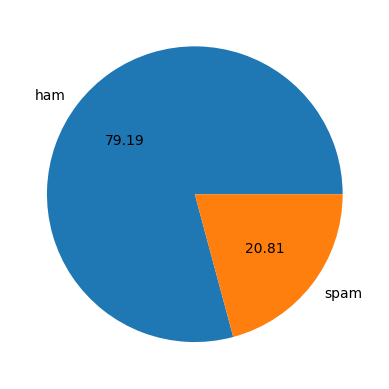

In [25]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_character']=df['text'].apply(len)

In [29]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861
10738,0,put the 10 on the ft\r\nthe transport volumes...,526
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106
10741,0,industrial worksheets for august 2000 activit...,565


In [30]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [31]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [32]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13
10741,0,industrial worksheets for august 2000 activit...,565,110,20


In [33]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,10162.000000,10162.000000,10162.000000
mean,561.694450,123.220527,7.577249
std,1191.658714,261.691005,20.438804
min,2.000000,0.000000,0.000000
25%,55.250000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,532.000000,120.000000,7.000000
max,32250.000000,8861.000000,1204.000000


In [34]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.882068,6.138934
std,1035.363196,246.858760,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [35]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,13.049645
std,1612.562568,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


In [36]:
import seaborn as sns

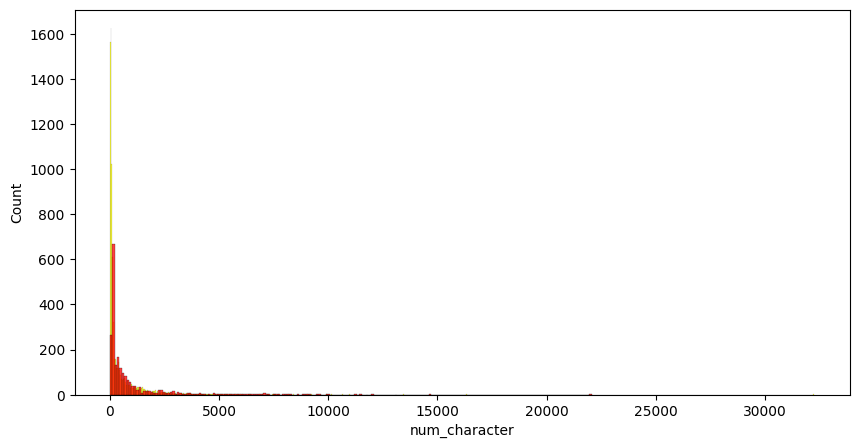

In [37]:

plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

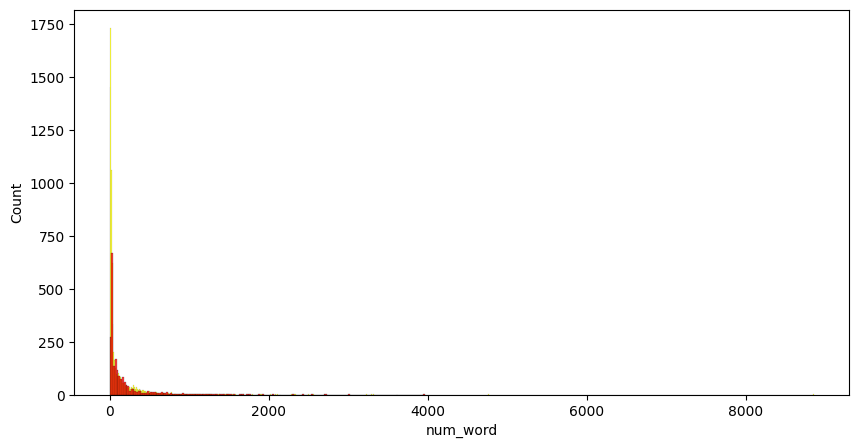

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

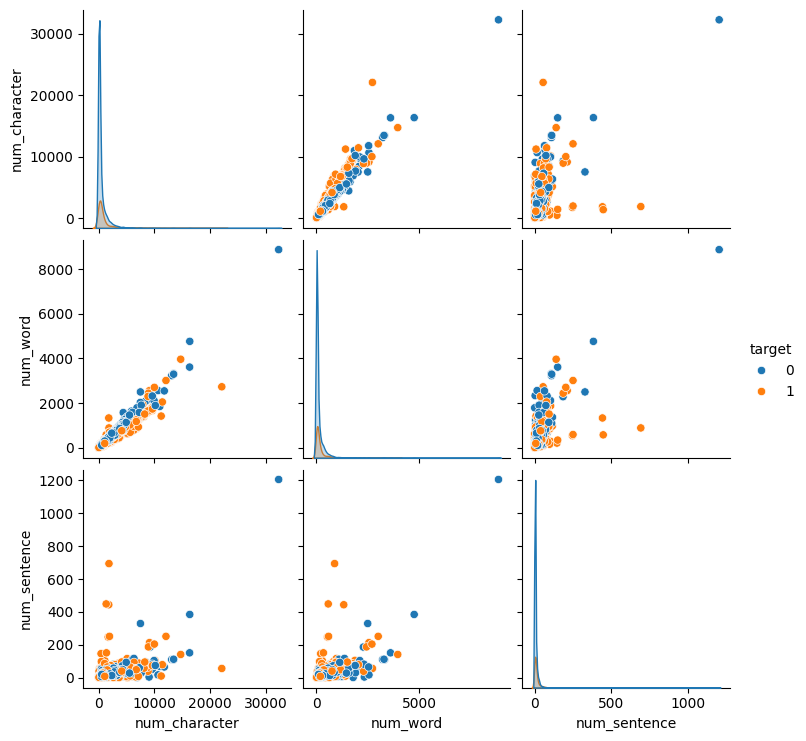

In [39]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

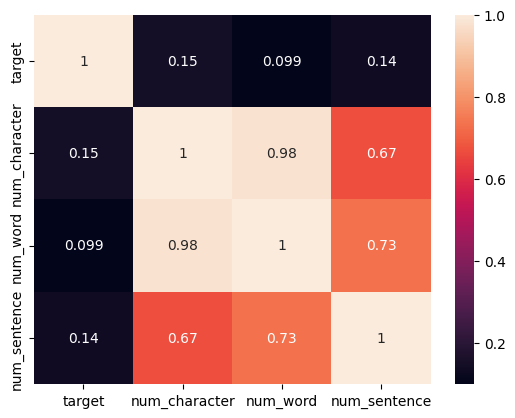

In [40]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [41]:
#data preprocess 
#lower case 
#tokenization 
#remove special character 
#remove stopwords 
#stemming 


In [45]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [47]:
from nltk.corpus import stopwords 


In [48]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
ps.stem('danceing')

'danc'

In [51]:
df['transform_text']=df['text'].apply(transform_text)

In [52]:
df#

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9,fw crosstex energi driscol ranch 1 3 meter no ...
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7,put 10 ft transport volum decreas 25000 10000 ...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13,3 4 2000 follow nom hpl take extra 15 mmcf wee...
10741,0,industrial worksheets for august 2000 activit...,565,110,20,industri worksheet august 2000 activ attach wo...


In [53]:
#word cloud
%pip install wordcloud
from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

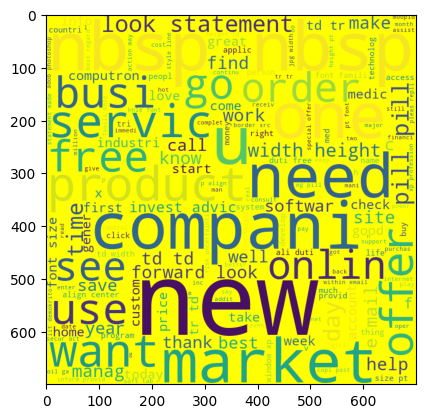

In [55]:
plt.imshow(spam_wc)

In [56]:
#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

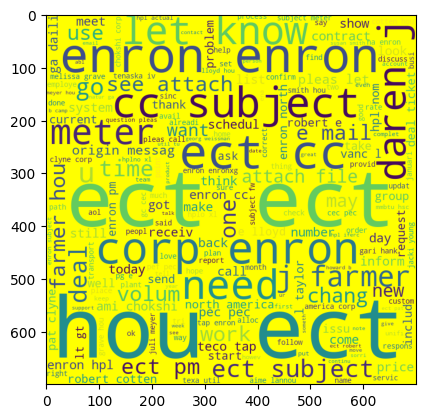

In [57]:
plt.imshow(ham_wc)

In [58]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [59]:
len(spam_corpus)

205069

In [60]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,3,1249
1,2,1008
2,http,999
3,com,989
4,compani,921
5,price,746
6,1,738
7,0,690
8,e,633
9,get,621


In [61]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [62]:
len(ham_corpus)

412348

In [63]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4210
4,deal,3492
5,ga,2798
6,pleas,2749
7,com,2714
8,meter,2709
9,subject,2679


# Model Building 


In [64]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [65]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [66]:
X.shape

(10162, 45520)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8991637973438269
[[1488  136]
 [  69  340]]
0.7142857142857143


In [74]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8908017707820954
[[1624    0]
 [ 222  187]]
1.0


In [75]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier , ExtraTreesClassifier, GradientBoostingClassifier
%pip install xgboost
from xgboost import XGBClassifier

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [80]:
df['transform_text'][4532]

'gr8 new servic live sex video chat mob see sexiest dirtiest girl live ur phone 4 detail text horni 89070 cancel send stop 89070'

In [81]:
df.sample(10)


,target,text,num_character,num_word,num_sentence,transform_text
3910,0,How i noe... She's in da car now... Later then...,77,21,2,noe da car later c lar wear short
1465,1,YOU 07801543489 are guaranteed the latests Nok...,159,30,3,07801543489 guarante latest nokia phone 40gb i...
1155,0,"Sorry man, accidentally left my phone on silen...",91,20,1,sorri man accident left phone silent last nigh...
8593,0,"hpl nom for february 8 , 2001\r\n( see attach...",90,22,3,hpl nom februari 8 2001 see attach file hplno ...
421,1,Someone has contacted our dating service and e...,162,28,3,someon contact date servic enter phone fanci f...
5335,0,No. It's not pride. I'm almost &lt;#&gt; yea...,192,53,5,pride almost lt gt year old takin money kid su...
7268,1,do you like computers\r\nincredible offers :\...,826,171,7,like comput incred offer window x p pro 2 oo 2...
7138,0,"hpl nom for march 30 , 2001\r\n( see attached...",88,22,3,hpl nom march 30 2001 see attach file hplno 33...
7506,0,"re : license\r\nto all :\r\nwell , let me tel...",670,170,21,licens well let tell like never ever ever stud...
1656,0,Yes I posted a couple of pics on fb. There's s...,90,24,3,ye post coupl pic fb still snow outsid wake
